# Color convertion from wavelength to RGB
(source: http://www.efg2.com/Lab/ScienceAndEngineering/Spectra.htm)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math

% matplotlib inline

In [2]:
gamma = 0.8
maxIntensity = 1

def ajustColor(color, factor):
    if color == 0.0:
        return 0
    else:
        result = maxIntensity * (color * factor)**gamma
        if result > maxIntensity:
            return maxIntensity
        else:
            return result

def convertWavelengthToRGB(wavelength):
    '''
    Convert a light wavelength in nanometer to RGB color.
    
    The algorithm works only for visible light (between 380nm and 780nm). It is callable out of the range but
    will return the value of 380 or 780.
    
    Return values:
        an array of three number representing the color in [red, green, blue] format. The colors
        are coded between 0 and 1.
    '''
    if wavelength < 380:
        wavelength = 380
    elif wavelength > 780:
        wavelength = 780
        
    if 380 <= wavelength <= 439:
        red = -(wavelength - 440) / (440 - 380)
        green = 0
        blue = 1
    elif 439 < wavelength <= 489:
        red = 0
        green = (wavelength - 440) / (490 - 440)
        blue = 1
    elif 489 < wavelength <= 509:
        red = 0
        green = 1
        blue = -(wavelength - 510) / (510 - 490)
    elif 509 < wavelength <= 579:
        red = (wavelength - 509) / (580 - 510)
        green = 1
        blue = 0
    elif 579 < wavelength <= 644:
        red = 1
        green = -(wavelength - 645) / (645 - 580)
        blue = 0
    elif 644 < wavelength <= 780:
        red = 1
        green = 0
        blue = 0
    else:
        red, green, blue = 0, 0, 0
    
    if 380 <= wavelength <= 419:
        factor = 0.3 + 0.7*(wavelength - 380) / (420 - 380)
    elif 419 < wavelength <= 700:
        factor = 1
    elif 700 < wavelength <= 780:
        factor = 0.3 + 0.7*(780 - wavelength) / (780 - 700)
    else:
        factor = 0
    
    red = ajustColor(red, factor)
    green = ajustColor(green, factor)
    blue = ajustColor(blue, factor)
    
    #print(wavelength)
    
    return [red, green, blue]

In [3]:
convertWavelengthToRGB(380)

[0.3816778909618176, 0, 0.3816778909618176]

In [4]:
def invertColor(color):
    return [1 - color[0], 1 - color[1], 1 - color[2]]

# Display a spectrum

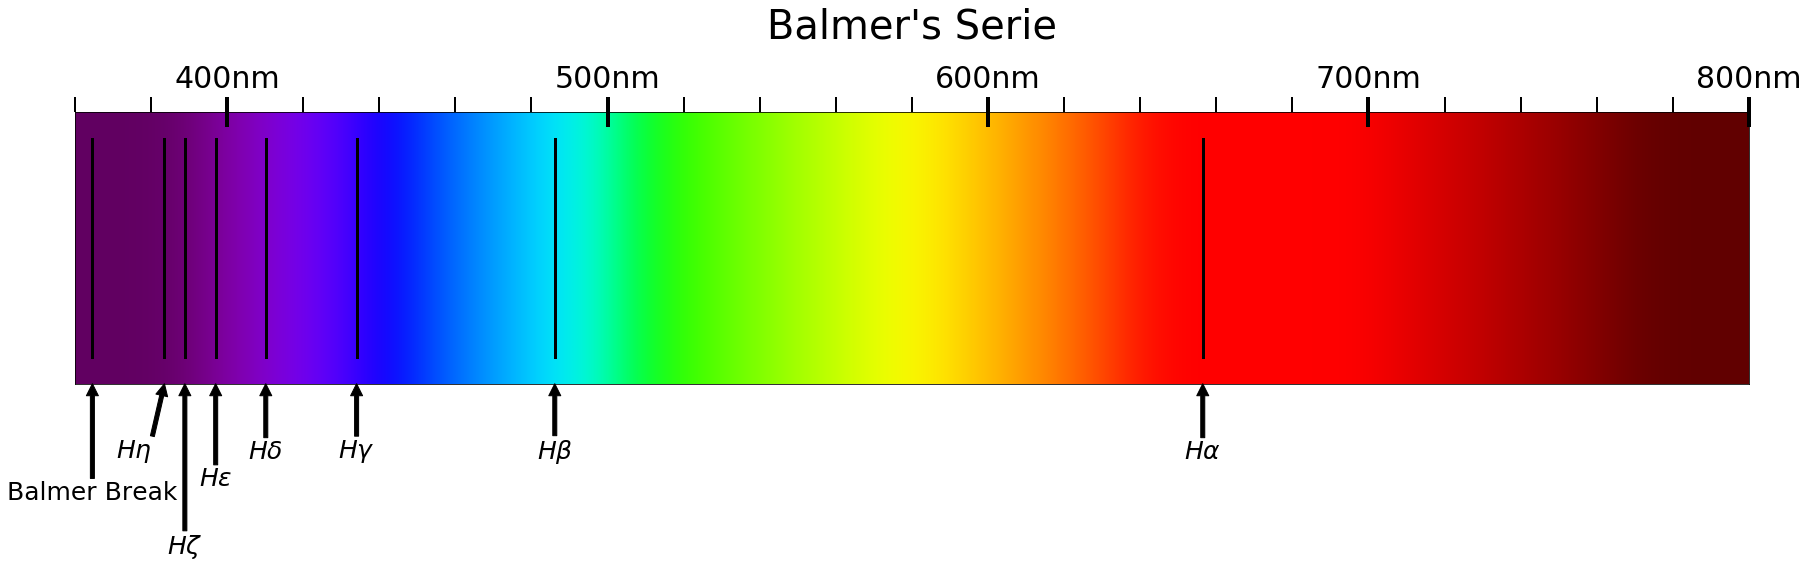

In [5]:
#Generate the image
startWaveLength = 360
stopWaveLength = 800

makorTicksInterval = 100
minorTicksInterval = 20

BalmerSerie = ((r'$H\alpha$', 656.45377, 0, 0),
               (r'$H\beta$', 486.13615, 0, 0),
              (r'$H\gamma$', 434.0462, 0, 0),
              (r'$H\delta$', 410.174, 0, 0),
              (r'$H\epsilon$', 397.0072, 0, -2),
              (r'$H\zeta$', 388.9049, 0, -7),
              (r'$H\eta$', 383.5384, -8, 0),
              ('Balmer Break', 364.6, 0, -3))

colors = []

for wavelength in np.linspace(startWaveLength, stopWaveLength, num=40):
    colors.append(convertWavelengthToRGB(wavelength))
image = [colors]*20

#Set the plot
params = {'axes.labelsize': 30,'axes.titlesize':20, 'font.size': 20, 'legend.fontsize': 20, 
          'xtick.labelsize': 30, 'ytick.labelsize': 40}
matplotlib.rcParams.update(params)

plt.rcParams["figure.figsize"] = [30, 5]
majorLocator = matplotlib.ticker.MultipleLocator(makorTicksInterval)
majorFormatter = matplotlib.ticker.FormatStrFormatter('%dnm')
minorLocator = matplotlib.ticker.MultipleLocator(minorTicksInterval)

fig, ax = plt.subplots()
#matplotlib.rc('xtick', labelsize=30)
fig = plt.imshow(image, interpolation='bicubic', aspect='auto', extent=[startWaveLength,stopWaveLength,0,20])

plt.title('Balmer\'s Serie', y=1.25, fontdict = dict(fontsize=40))

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)

ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticks_position('top')

#ax.tick_params(axis='xticks', which='major', labelsize=30)
#ax.tick_params(axis='xticks', which='minor', labelsize=20)

ax.tick_params(which='major', direction='inout', length=30, width=4, colors='k')
ax.tick_params(which='minor', direction='out', length=15, width=2, colors='k')

fig.axes.get_yaxis().set_visible(False)

#Add an annotation
for l in BalmerSerie:
    if startWaveLength <= l[1] <= stopWaveLength: 
        ax.annotate(l[0], xy=(l[1], 0), xytext=(l[1] + l[2], -5 + l[3]), 
                arrowprops=dict(facecolor='black', shrink=0.0), size = 25, ha='center', va='center')

    #And a line
        plt.plot([l[1], l[1]], [2, 18], color='k', lw=3, alpha=1)
    
#plt.savefig('image.png', bbox_inches="tight")